# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to 
# get started!

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Create a new dataframe from your CSV

df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [2]:
# Print out any information you need to understand your dataframe

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
# Print out any information you need to understand your dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
# Print out any information you need to understand your dataframe

df.shape

(23486, 11)

In [5]:
# Print out any information you need to understand your dataframe

df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<Axes: >

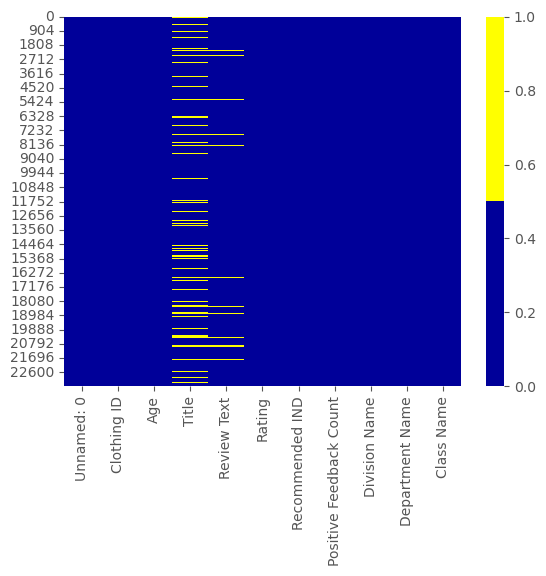

In [6]:
# Plot a heatmap of any missing data

cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [7]:
# Try out a missing data percentage list! 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, (pct_missing*100)))

Unnamed: 0 - 0.0%
Clothing ID - 0.0%
Age - 0.0%
Title - 16.22243038405859%
Review Text - 3.5978881035510515%
Rating - 0.0%
Recommended IND - 0.0%
Positive Feedback Count - 0.0%
Division Name - 0.059609980413863575%
Department Name - 0.059609980413863575%
Class Name - 0.059609980413863575%


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<Axes: xlabel='index'>

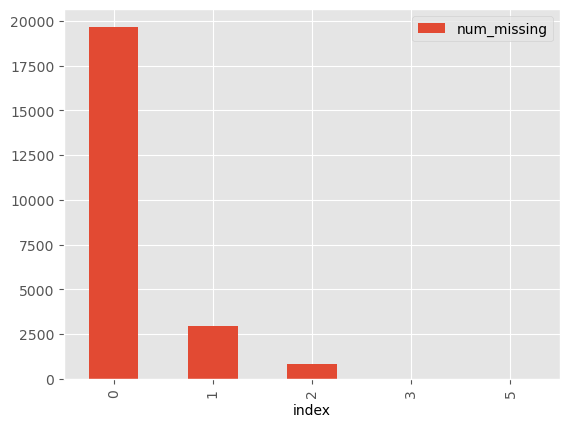

In [8]:
# Plot a missing data histogram

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

I found missing data in the Title, Review Text, Division Name, Department Name, and Class Name columns.

I am going to drop the rows with missing data from the Division Name, Department Name, and Class Name columns because they are only missing ~0.06% of their data. I don't think deleting the rows with missing data will bias the results since it's such a small proportion of the data. 

I am going to replace the missing values of the Title and Review Text columns with _MISSING_. I'm going to replace them instead of imputing or deleting because the columns are categorical and there is unlikely to be a mode, and because I'm not yet sure if the data are irrelevant and should be deleted. 

In [9]:
# Handle any missing data in your dataframe.

df.dropna(subset=['Division Name', 'Department Name', 'Class Name'])

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,Review Text_ismissing,Division Name_ismissing,Department Name_ismissing,Class Name_ismissing,num_missing
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,True,False,False,False,False,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,True,False,False,False,False,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,False,False,False,False,False,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,False,False,False,False,False,0
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,False,False,False,False,False,0
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,False,False,False,False,False,0
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,False,False,False,False,False,0
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,False,False,False,False,False,0


In [11]:
# Handle any missing data in your dataframe.

df['Title'] = df['Title'].fillna('_MISSING_')
df['Title'] = df['Review Text'].fillna('_MISSING_')

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<Axes: >

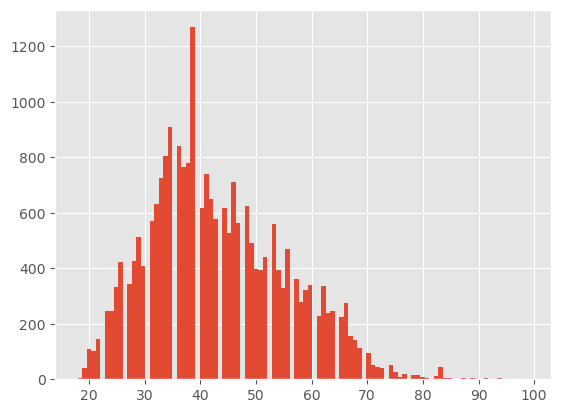

In [12]:
# Plot a histogram to see if there are any outliers.

df['Age'].hist(bins=100)

<Axes: >

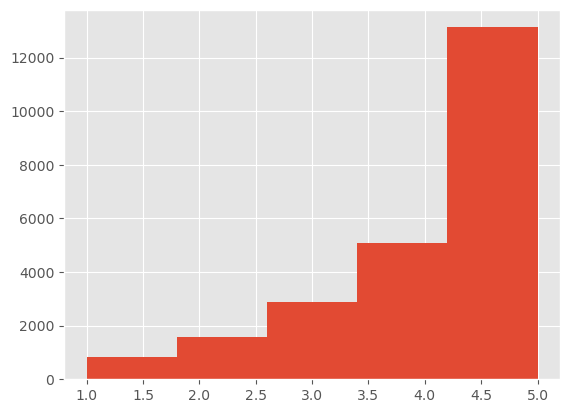

In [13]:
# Plot a histogram to see if there are any outliers.

df['Rating'].hist(bins=5)

<Axes: >

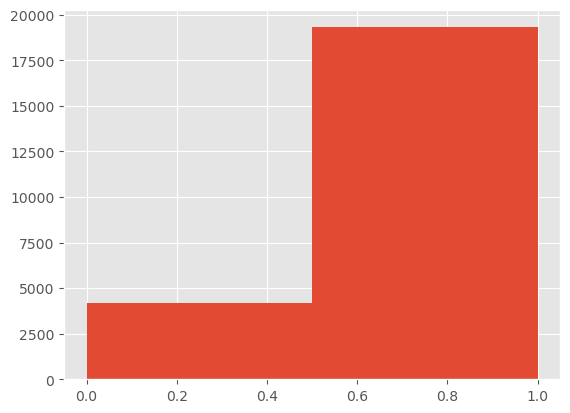

In [14]:
# Plot a histogram to see if there are any outliers.

df['Recommended IND'].hist(bins=2)

<Axes: >

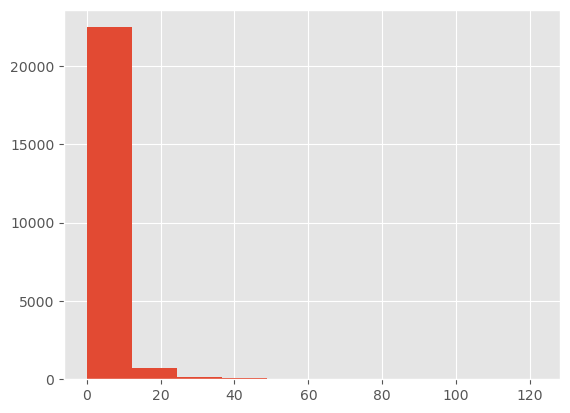

In [15]:
# Plot a histogram to see if there are any outliers.

df['Positive Feedback Count'].hist(bins=10)

In [16]:
# Use the describe() method

df[['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count']].describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,0.822362,2.535936
std,12.279544,1.110031,0.382216,5.702202
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


<Axes: >

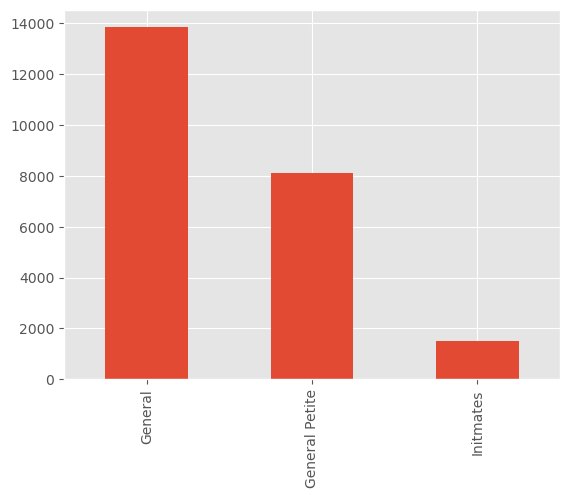

In [17]:
# Plot a bar chart

df['Division Name'].value_counts().plot.bar()

<Axes: >

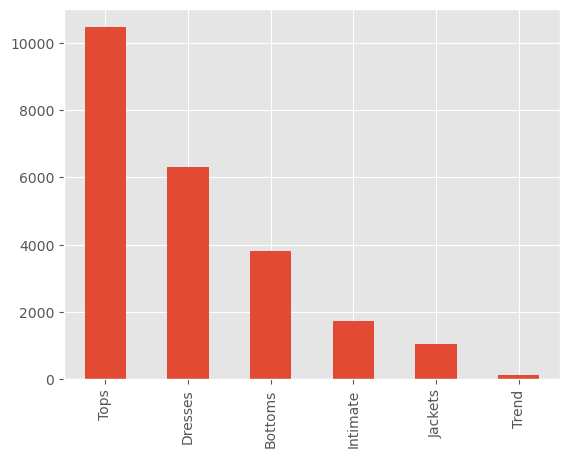

In [18]:
# Plot a bar chart

df['Department Name'].value_counts().plot.bar()

<Axes: >

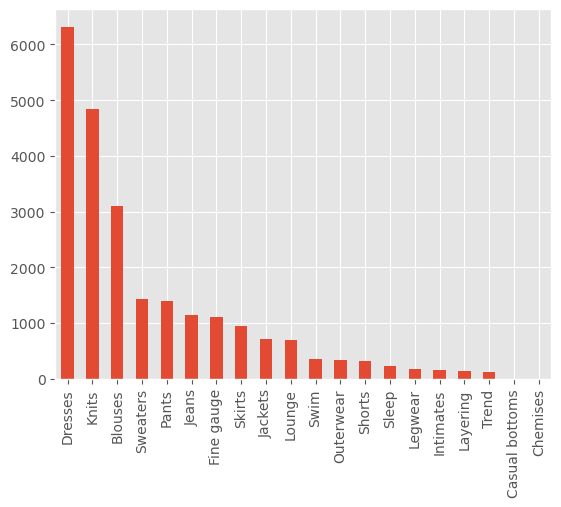

In [19]:
# Plot a bar chart

df['Class Name'].value_counts().plot.bar()

<Axes: >

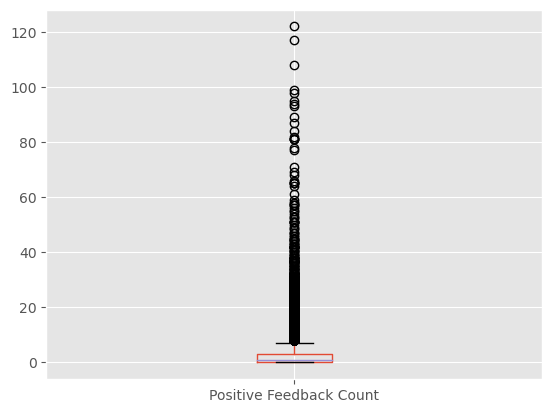

In [20]:
df.boxplot(column=['Positive Feedback Count'])


Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [ ]:
# Handle any outliers in your dataframe

# I came up with the below solution for outliers for the Positive Feedback Count but am not going to run it because 
# I don't think we need to get rid of the "outliers". I just wanted to show one method for how I would solve this 
# problem.

# Remove the outlier from positive count--identify through iloc?
# Q1 = df['Positive Feedback Count'].quantile(0.25)
# Q3 = df['Positive Feedback Count'].quantile(0.75)
# IQR = Q3 - Q1
# lower = Q1 - 1.5*IQR
# upper = Q3 + 1.5*IQR
 
# # Create arrays of Boolean values indicating the outlier rows
# upper_array = np.where(df['Positive Feedback Count']>=upper)[0]
# lower_array = np.where(df['Positive Feedback Count']<=lower)[0]
 
# # Removing the outliers
# df.drop(index=upper_array, inplace=True)
# df.drop(index=lower_array, inplace=True)

# print("New Shape: ", df.shape)

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [ ]:
# Look for any irrelevant data in the dataframe. How will you handle it?

# Until I know more about the analyses we need, I can't say for certain whether any of the data are irrelevant. 
# I will leave all the data in the data set because I can think of business questions that would require all features.

In [21]:
dupes = df.duplicated()
dupes.sum()

0

In [22]:
# Look for duplicates. How will you handle any duplicates?

df_dedupped = df.drop_duplicates()

print(df.shape)
print(df_dedupped.shape)

# Based on this analysis there are no duplicates...?

(23486, 17)
(23486, 17)


In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data 
# uninformative and how you would handle it?

# Any data may be uninformative depending on the business questions. For example, the business may not care about 
# the age of the rater and may choose to discard this information. They may only care about the rating of a clothing 
# item and may not care about the title or review text and wish to discard those fields. I would discard data deemed 
# uninformative once I know what the business questions were and could determine which data was informative and 
# uninformative. 

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [23]:
df[['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']].head()

,Title,Review Text,Division Name,Department Name,Class Name
0,Absolutely wonderful - silky and sexy and comf...,Absolutely wonderful - silky and sexy and comf...,Initmates,Intimate,Intimates
1,Love this dress! it's sooo pretty. i happene...,Love this dress! it's sooo pretty. i happene...,General,Dresses,Dresses
2,I had such high hopes for this dress and reall...,I had such high hopes for this dress and reall...,General,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...","I love, love, love this jumpsuit. it's fun, fl...",General Petite,Bottoms,Pants
4,This shirt is very flattering to all due to th...,This shirt is very flattering to all due to th...,General,Tops,Blouses


In [24]:
df['Title'] = str(df['Title'])
df['Review Text'] = str(df['Review Text'])
df['Division Name'] = str(df['Division Name'])
df['Department Name'] = str(df['Department Name'])
df['Class Name'] = str(df['Class Name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 23486 non-null  int64 
 1   Clothing ID                23486 non-null  int64 
 2   Age                        23486 non-null  int64 
 3   Title                      23486 non-null  object
 4   Review Text                23486 non-null  object
 5   Rating                     23486 non-null  int64 
 6   Recommended IND            23486 non-null  int64 
 7   Positive Feedback Count    23486 non-null  int64 
 8   Division Name              23486 non-null  object
 9   Department Name            23486 non-null  object
 10  Class Name                 23486 non-null  object
 11  Title_ismissing            23486 non-null  bool  
 12  Review Text_ismissing      23486 non-null  bool  
 13  Division Name_ismissing    23486 non-null  bool  
 14  Depart

In [25]:
# Try to convert all the strings in a column to lower or upper case. 

df['Title_lower'] = df['Title'].str.lower()
df['Review Text_lower'] = df['Review Text'].str.lower()
df['Division Name_lower'] = df['Division Name'].str.lower()
df['Department Name_lower'] = df['Department Name'].str.lower()
df['Class Name_lower'] = df['Class Name'].str.lower()

In [26]:
df[['Title_lower', 'Review Text_lower', 'Division Name_lower', 'Department Name_lower', 'Class Name_lower']].head()

,Title_lower,Review Text_lower,Division Name_lower,Department Name_lower,Class Name_lower
0,0 absolutely wonderful - silky and sexy...,0 absolutely wonderful - silky and sexy...,0 initmates\n1 gener...,0 intimate\n1 dresses\n2 ...,0 intimates\n1 dresses\n2 ...
1,0 absolutely wonderful - silky and sexy...,0 absolutely wonderful - silky and sexy...,0 initmates\n1 gener...,0 intimate\n1 dresses\n2 ...,0 intimates\n1 dresses\n2 ...
2,0 absolutely wonderful - silky and sexy...,0 absolutely wonderful - silky and sexy...,0 initmates\n1 gener...,0 intimate\n1 dresses\n2 ...,0 intimates\n1 dresses\n2 ...
3,0 absolutely wonderful - silky and sexy...,0 absolutely wonderful - silky and sexy...,0 initmates\n1 gener...,0 intimate\n1 dresses\n2 ...,0 intimates\n1 dresses\n2 ...
4,0 absolutely wonderful - silky and sexy...,0 absolutely wonderful - silky and sexy...,0 initmates\n1 gener...,0 intimate\n1 dresses\n2 ...,0 intimates\n1 dresses\n2 ...
